#### main experiments

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
from statistics import mean, variance
import scipy.stats

def min_max_scaler(data, original_min, original_max, min_value, max_value):
    original_range = original_max - original_min
    desired_range = max_value - min_value

    scaled_data = {}
    for k, number in data.items():
        # Standardize the number
        standardized_number = (number - original_min) / original_range

        # Scale the standardized number to the desired range
        scaled_number = (standardized_number * desired_range) + min_value
        scaled_data[k] = scaled_number
        
    return scaled_data

In [51]:
# loading multiple seeds results
def aggregate_dict(dicts, aggregate_func=max):
    results = {}
    for d in dicts:
        for k, v in d.items():
            if k not in results:
                results[k] = [v]
            else:
                results[k].append(v)
    for k, v in results.items():
        results[k] = aggregate_func(v)
    return results

In [83]:
baseline_lower_bounds = [0.5079, 0.5032, 0.5018, 0.5032]
baseline_upper_bounds = [0.8516, 0.8516, 0.8516, 0.8516]

loaded_objects = {
    'lower_bound_alignment': [],
    'both_bound_alignment': [],
    'midpoint_alignment': [],
    'bracket_alignment': [],
}
for seed in [42, 66, 77]:
    with open(f'./logs/eval_main_results_seed_{seed}.pkl', 'rb') as file:
        # Load the pickled object from the file
        loaded_object = pickle.load(file)
        for k, v in loaded_object.items():
            loaded_objects[k] += [loaded_object[k]]

oracle_lb_data = min_max_scaler(aggregate_dict(loaded_objects['lower_bound_alignment']), 0.5079, 0.8516, 0, 1)
oracle_lub_data = min_max_scaler(aggregate_dict(loaded_objects['both_bound_alignment']), 0.5032, 0.8516, 0, 1)
control_midpoint_data = min_max_scaler(aggregate_dict(loaded_objects['midpoint_alignment']), 0.5018, 0.8516, 0, 1)
control_bracket_data = min_max_scaler(aggregate_dict(loaded_objects['bracket_alignment']), 0.5032, 0.8516, 0, 1)

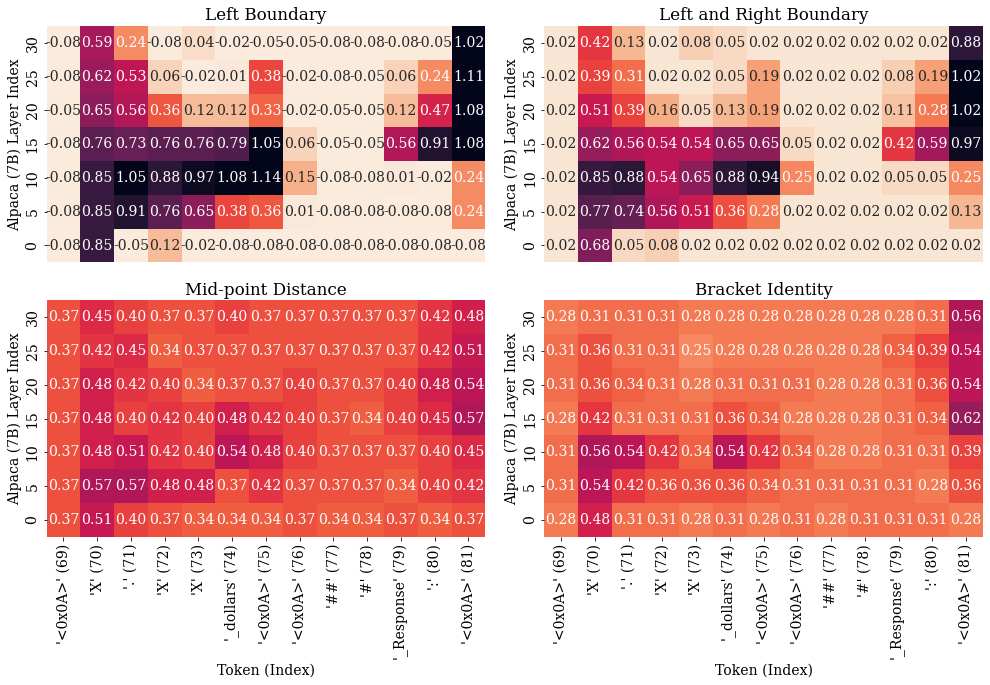

In [84]:
df = pd.DataFrame(list(oracle_lb_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_oracle_lb_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(oracle_lub_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_oracle_lub_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(control_midpoint_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_control_midpoint_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(control_bracket_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_control_bracket_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 14}
plt.rc('font', **font)

fig, ax = plt.subplots(2, 2, figsize=(14, 9.9))
sns.heatmap(
    heatmap_oracle_lb_df, yticklabels=heatmap_oracle_lb_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[0, 0], xticklabels=[]
)

sns.heatmap(
    heatmap_oracle_lub_df, yticklabels=heatmap_oracle_lub_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[0, 1], xticklabels=[]
)

sns.heatmap(
    heatmap_control_midpoint_df, yticklabels=heatmap_control_midpoint_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[1, 0],
    xticklabels=["'<0x0A>' (69)", "'X' (70)", "'.' (71)", "'X' (72)", "'X' (73)", 
                 "'_dollars' (74)", "'<0x0A>' (75)", 
                 "'<0x0A>' (76)", "'##' (77)", "'#' (78)", 
                 "'_Response' (79)", "':' (80)", "'<0x0A>' (81)"]
)

sns.heatmap(
    heatmap_control_bracket_df, yticklabels=heatmap_control_bracket_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[1, 1],
    xticklabels=["'<0x0A>' (69)", "'X' (70)", "'.' (71)", "'X' (72)", "'X' (73)", 
                 "'_dollars' (74)", "'<0x0A>' (75)", 
                 "'<0x0A>' (76)", "'##' (77)", "'#' (78)", 
                 "'_Response' (79)", "':' (80)", "'<0x0A>' (81)"]
)
ax[0, 0].set(xlabel=None,
       ylabel='Alpaca (7B) Layer Index',
       title='Left Boundary')
ax[0, 1].set(xlabel=None,
       ylabel='Alpaca (7B) Layer Index',
       title='Left and Right Boundary')
ax[1, 0].set(xlabel='Token (Index)',
       ylabel='Alpaca (7B) Layer Index',
       title='Mid-point Distance')
ax[1, 1].set(xlabel='Token (Index)',
       ylabel='Alpaca (7B) Layer Index',
       title='Bracket Identity')

fig.tight_layout()
# plt.show()
plt.savefig("./logs/main-heatmap-standard.svg", bbox_inches='tight')

#### All Other Results with a Table

In [85]:
# loading all the results per seed, aggregate over seeds, and prepare for the table.
main_results = {
    'lower_bound_alignment': [],
    'both_bound_alignment': [],
    'midpoint_alignment': [],
    'bracket_alignment': [],
    'correct_results': [],
    'incorrect_results': [],
    'original': [],
    'transfer': [],
    'Context 1': [],
    'Context 2': [],
    'Sibling': [],
}
main_results_flatten = {
    'lower_bound_alignment': [],
    'both_bound_alignment': [],
    'midpoint_alignment': [],
    'bracket_alignment': [],
    'correct_results': [],
    'incorrect_results': [],
    'original': [],
    'transfer': [],
    'Context 1': [],
    'Context 2': [],
    'Sibling': [],
}
for seed in [42, 66, 77]:
    with open(f'./logs/eval_main_results_seed_{seed}.pkl', 'rb') as file:
        # Load the pickled object from the file
        loaded_object = pickle.load(file)
        for k, v in loaded_object.items():
            main_results[k] += [loaded_object[k]]
            
    with open(f'./logs/eval_results_consistency_seed_{seed}.pkl', 'rb') as file:
        # Load the pickled object from the file
        loaded_object = pickle.load(file)
        for k, v in loaded_object.items():
            main_results[k] += [loaded_object[k]]
    
    with open(f'./logs/eval_zero_shot_results_seed_{seed}.pkl', 'rb') as file:
        # Load the pickled object from the file
        loaded_object = pickle.load(file)
        for k, v in loaded_object.items():
            main_results[k] += [loaded_object[k]]
    
    with open(f'./logs/eval_results_irrelevant_context_seed_{seed}.pkl', 'rb') as file:
        # Load the pickled object from the file
        loaded_object = pickle.load(file)
        for k, v in loaded_object.items():
            if k == "Pricing tag game!":
                main_results['Context 1'] += [loaded_object[k]]
            elif k == "Fruitarian Frogs May Be Doing Flowers a Favor":
                main_results['Context 2'] += [loaded_object[k]]
            else:
                main_results[k] += [loaded_object[k]]

    # Open the pickled file for binary reading
    with open(f'./logs/eval_different_return_results_seed_{seed}.pkl', 'rb') as file:
        # Load the pickled object from the file
        loaded_object = pickle.load(file)  
        main_results['Sibling'] += [loaded_object]
    
for k, v in main_results.items():
    aggregate_result = aggregate_dict(v)
    for token_idx in [69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]:
        for layer_idx in [0, 5, 10, 15, 20, 25, 30]:
            if k == "Context 1":
                main_results_flatten[k].append(aggregate_result[(layer_idx, token_idx+6)])
            elif k == "Context 2":
                main_results_flatten[k].append(aggregate_result[(layer_idx, token_idx+15)])
            else:
                main_results_flatten[k].append(aggregate_result[(layer_idx, token_idx)])

In [86]:
table_data = []
sequence = [
    'lower_bound_alignment', 'both_bound_alignment', \
    'midpoint_alignment', 'bracket_alignment', \
    'correct_results', 'incorrect_results', \
    'original', 'transfer', 'Context 1', 'Context 2', \
    'Sibling'
]
for exp in sequence:
    max_iia = max(main_results_flatten[exp])
    var = variance(main_results_flatten[exp])*100
    if exp in [
        'lower_bound_alignment', 'both_bound_alignment', \
        'midpoint_alignment', 'bracket_alignment'
    ]:
        corr = 1.0
    elif exp in ['original', 'transfer']:
        corr = scipy.stats.pearsonr(main_results_flatten[exp], main_results_flatten['lower_bound_alignment'])[0]
    else:
        corr = scipy.stats.pearsonr(main_results_flatten[exp], main_results_flatten['both_bound_alignment'])[0]
    table_data += [[max_iia, corr, var]]

In [87]:
df = pd.DataFrame(table_data, columns =[
    'IIA_max', 'Correlation', 'Variance'
]) 
print(df.round(2).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  IIA\_max &  Correlation &  Variance \\
\midrule
0  &     0.90 &         1.00 &      2.01 \\
1  &     0.86 &         1.00 &      1.14 \\
2  &     0.70 &         1.00 &      0.04 \\
3  &     0.72 &         1.00 &      0.08 \\
4  &     0.88 &         0.99 &      1.47 \\
5  &     0.71 &         0.84 &      0.36 \\
6  &     0.94 &         0.97 &      3.02 \\
7  &     0.95 &         0.94 &      1.66 \\
8  &     0.83 &         0.97 &      0.94 \\
9  &     0.85 &         0.98 &      1.04 \\
10 &     0.83 &         0.87 &      0.93 \\
\bottomrule
\end{tabular}



#### Appendix Results

raw main results

In [59]:
loaded_objects = {
    'lower_bound_alignment': [],
    'both_bound_alignment': [],
    'midpoint_alignment': [],
    'bracket_alignment': [],
}
for seed in [42, 66, 77]:
    with open(f'./logs/eval_main_results_seed_{seed}.pkl', 'rb') as file:
        # Load the pickled object from the file
        loaded_object = pickle.load(file)
        for k, v in loaded_object.items():
            loaded_objects[k] += [loaded_object[k]]

oracle_lb_data = aggregate_dict(loaded_objects['lower_bound_alignment'])
oracle_lub_data = aggregate_dict(loaded_objects['both_bound_alignment'])
control_midpoint_data = aggregate_dict(loaded_objects['midpoint_alignment'])
control_bracket_data = aggregate_dict(loaded_objects['bracket_alignment'])

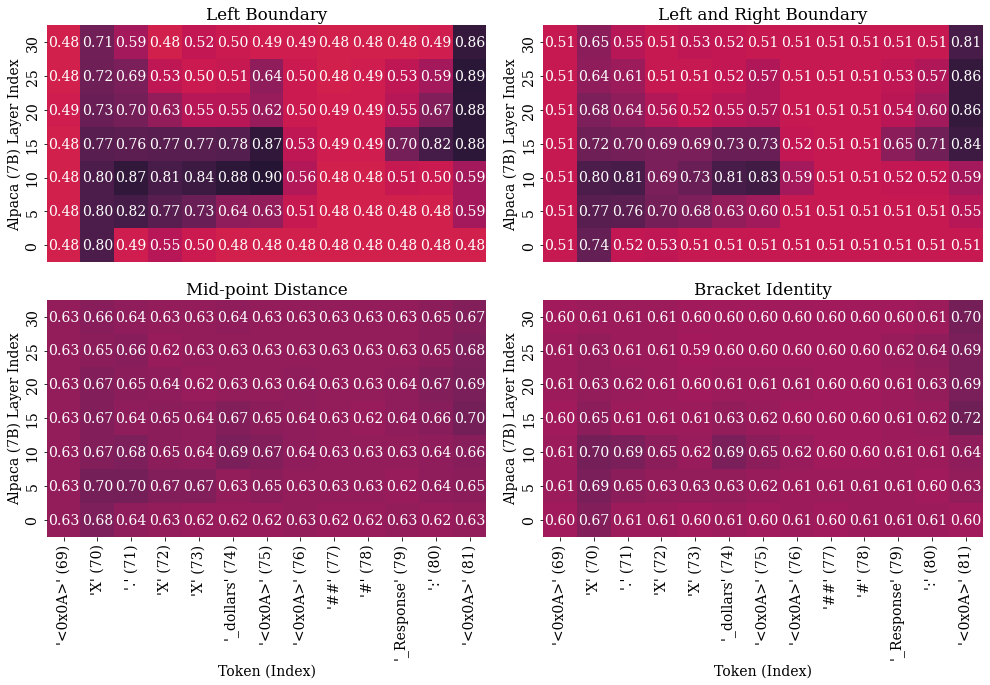

In [60]:
df = pd.DataFrame(list(oracle_lb_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_oracle_lb_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(oracle_lub_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_oracle_lub_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(control_midpoint_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_control_midpoint_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(control_bracket_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_control_bracket_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 14}
plt.rc('font', **font)

fig, ax = plt.subplots(2, 2, figsize=(14, 9.9))
sns.heatmap(
    heatmap_oracle_lb_df, yticklabels=heatmap_oracle_lb_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[0, 0], xticklabels=[]
)

sns.heatmap(
    heatmap_oracle_lub_df, yticklabels=heatmap_oracle_lub_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[0, 1], xticklabels=[]
)

sns.heatmap(
    heatmap_control_midpoint_df, yticklabels=heatmap_control_midpoint_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[1, 0],
    xticklabels=["'<0x0A>' (69)", "'X' (70)", "'.' (71)", "'X' (72)", "'X' (73)", 
                 "'_dollars' (74)", "'<0x0A>' (75)", 
                 "'<0x0A>' (76)", "'##' (77)", "'#' (78)", 
                 "'_Response' (79)", "':' (80)", "'<0x0A>' (81)"]
)

sns.heatmap(
    heatmap_control_bracket_df, yticklabels=heatmap_control_bracket_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[1, 1],
    xticklabels=["'<0x0A>' (69)", "'X' (70)", "'.' (71)", "'X' (72)", "'X' (73)", 
                 "'_dollars' (74)", "'<0x0A>' (75)", 
                 "'<0x0A>' (76)", "'##' (77)", "'#' (78)", 
                 "'_Response' (79)", "':' (80)", "'<0x0A>' (81)"]
)
ax[0, 0].set(xlabel=None,
       ylabel='Alpaca (7B) Layer Index',
       title='Left Boundary')
ax[0, 1].set(xlabel=None,
       ylabel='Alpaca (7B) Layer Index',
       title='Left and Right Boundary')
ax[1, 0].set(xlabel='Token (Index)',
       ylabel='Alpaca (7B) Layer Index',
       title='Mid-point Distance')
ax[1, 1].set(xlabel='Token (Index)',
       ylabel='Alpaca (7B) Layer Index',
       title='Bracket Identity')

fig.tight_layout()
# plt.show()
plt.savefig("./logs/main-heatmap.svg", bbox_inches='tight')

raw consistency

In [88]:
loaded_objects = {
    'correct_results': [],
    'incorrect_results': [],
}
for seed in [42, 66, 77]:
    with open(f'./logs/eval_results_consistency_seed_{seed}.pkl', 'rb') as file:
        # Load the pickled object from the file
        loaded_object = pickle.load(file)
        for k, v in loaded_object.items():
            loaded_objects[k] += [loaded_object[k]]

consistency_correct_data = aggregate_dict(loaded_objects['correct_results'])
consistency_incorrect_data = aggregate_dict(loaded_objects['incorrect_results'])

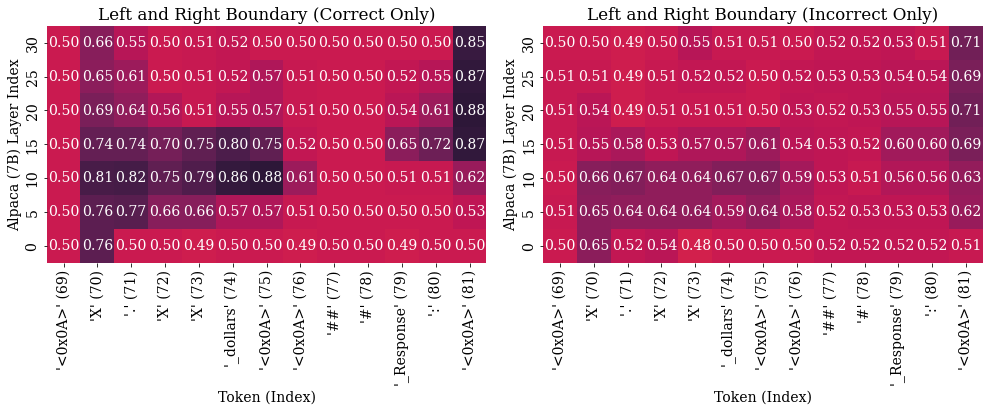

In [89]:
df = pd.DataFrame(list(consistency_correct_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_consistency_correct_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(consistency_incorrect_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_consistency_incorrect_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 14}
plt.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(14, 5.5))
sns.heatmap(
    heatmap_consistency_correct_df, yticklabels=heatmap_consistency_correct_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[0],
    xticklabels=["'<0x0A>' (69)", "'X' (70)", "'.' (71)", "'X' (72)", "'X' (73)", 
                 "'_dollars' (74)", "'<0x0A>' (75)", 
                 "'<0x0A>' (76)", "'##' (77)", "'#' (78)", 
                 "'_Response' (79)", "':' (80)", "'<0x0A>' (81)"]
)

sns.heatmap(
    heatmap_consistency_incorrect_df, yticklabels=heatmap_consistency_incorrect_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[1],
    xticklabels=["'<0x0A>' (69)", "'X' (70)", "'.' (71)", "'X' (72)", "'X' (73)", 
                 "'_dollars' (74)", "'<0x0A>' (75)", 
                 "'<0x0A>' (76)", "'##' (77)", "'#' (78)", 
                 "'_Response' (79)", "':' (80)", "'<0x0A>' (81)"]
)

ax[0].set(xlabel='Token (Index)',
       ylabel='Alpaca (7B) Layer Index',
       title='Left and Right Boundary (Correct Only)')
ax[1].set(xlabel='Token (Index)',
       ylabel='Alpaca (7B) Layer Index',
       title='Left and Right Boundary (Incorrect Only)')

fig.tight_layout()
# plt.show()
plt.savefig("./logs/calibration.svg", bbox_inches='tight')

#### Irrelevant Context

In [77]:
loaded_objects = {
    'Pricing tag game!': [],
    'Fruitarian Frogs May Be Doing Flowers a Favor': [],
}
for seed in [42, 66, 77]:
    with open(f'./logs/eval_results_irrelevant_context_seed_{seed}.pkl', 'rb') as file:
        # Load the pickled object from the file
        loaded_object = pickle.load(file)
        for k, v in loaded_object.items():
            loaded_objects[k] += [loaded_object[k]]
irrelevant_context_1 = aggregate_dict(loaded_objects['Pricing tag game!'])
irrelevant_context_2 = aggregate_dict(loaded_objects['Fruitarian Frogs May Be Doing Flowers a Favor'])

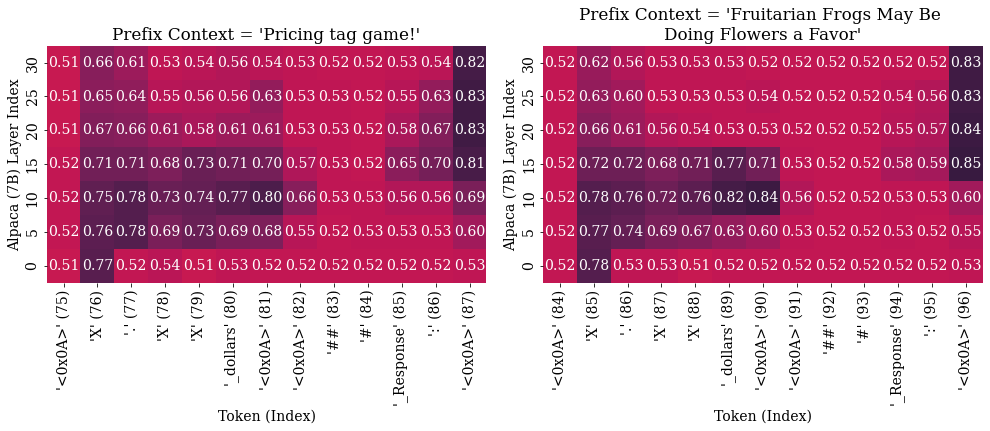

In [78]:
df = pd.DataFrame(list(irrelevant_context_1.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_context_1_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(irrelevant_context_2.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_context_2_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 14}
plt.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(14, 5.5))
sns.heatmap(
    heatmap_context_1_df, yticklabels=heatmap_context_1_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[0],
    xticklabels=["'<0x0A>' (75)", "'X' (76)", "'.' (77)", "'X' (78)", "'X' (79)", 
                 "'_dollars' (80)", "'<0x0A>' (81)", 
                 "'<0x0A>' (82)", "'##' (83)", "'#' (84)", 
                 "'_Response' (85)", "':' (86)", "'<0x0A>' (87)"]
)

sns.heatmap(
    heatmap_context_2_df, yticklabels=heatmap_context_2_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[1],
    xticklabels=["'<0x0A>' (84)", "'X' (85)", "'.' (86)", "'X' (87)", "'X' (88)", 
                 "'_dollars' (89)", "'<0x0A>' (90)", 
                 "'<0x0A>' (91)", "'##' (92)", "'#' (93)", 
                 "'_Response' (94)", "':' (95)", "'<0x0A>' (96)"]
)

ax[0].set(xlabel='Token (Index)',
       ylabel='Alpaca (7B) Layer Index',
       title="Prefix Context = 'Pricing tag game!'")
ax[1].set(xlabel='Token (Index)',
       ylabel='Alpaca (7B) Layer Index',
       title="Prefix Context = 'Fruitarian Frogs May Be \nDoing Flowers a Favor'")

fig.tight_layout()
# plt.show()
plt.savefig("./logs/irrelevant-context.svg", bbox_inches='tight')

#### Zero-shot between two tasks

In [79]:
loaded_objects = {
    'original': [],
    'transfer': [],
}
for seed in [42, 66, 77]:
    with open(f'./logs/eval_zero_shot_results_seed_{seed}.pkl', 'rb') as file:
        # Load the pickled object from the file
        loaded_object = pickle.load(file)
        for k, v in loaded_object.items():
            loaded_objects[k] += [loaded_object[k]]
original = aggregate_dict(loaded_objects['original'])
transfer = aggregate_dict(loaded_objects['transfer'])

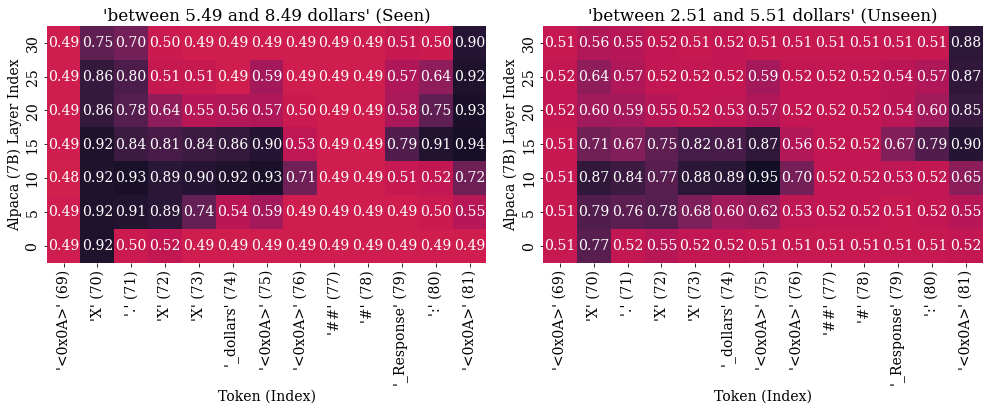

In [80]:
df = pd.DataFrame(list(original.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_original_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(transfer.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_transfer_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 14}
plt.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(14, 5.5))
sns.heatmap(
    heatmap_original_df, yticklabels=heatmap_original_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[0],
    xticklabels=["'<0x0A>' (69)", "'X' (70)", "'.' (71)", "'X' (72)", "'X' (73)", 
                 "'_dollars' (74)", "'<0x0A>' (75)", 
                 "'<0x0A>' (76)", "'##' (77)", "'#' (78)", 
                 "'_Response' (79)", "':' (80)", "'<0x0A>' (81)"]
)

sns.heatmap(
    heatmap_transfer_df, yticklabels=heatmap_transfer_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[1],
    xticklabels=["'<0x0A>' (69)", "'X' (70)", "'.' (71)", "'X' (72)", "'X' (73)", 
                 "'_dollars' (74)", "'<0x0A>' (75)", 
                 "'<0x0A>' (76)", "'##' (77)", "'#' (78)", 
                 "'_Response' (79)", "':' (80)", "'<0x0A>' (81)"]
)

ax[0].set(xlabel='Token (Index)',
       ylabel='Alpaca (7B) Layer Index',
       title="'between 5.49 and 8.49 dollars' (Seen)")
ax[1].set(xlabel='Token (Index)',
       ylabel='Alpaca (7B) Layer Index',
       title="'between 2.51 and 5.51 dollars' (Unseen)")

fig.tight_layout()
# plt.show()
plt.savefig("./logs/zeroshot-transfer.svg", bbox_inches='tight')

#### Zero-shot sibiling instruction transfer

In [81]:
loaded_objects = {
    'original': [],
    'transfer': [],
}
for seed in [42, 66, 77]:
    with open(f'./logs/eval_main_results_seed_{seed}.pkl', 'rb') as file:
        # Load the pickled object from the file
        loaded_object = pickle.load(file)
        loaded_objects['original'] += [loaded_object['both_bound_alignment']]
        
    with open(f'./logs/eval_different_return_results_seed_{seed}.pkl', 'rb') as file:
        # Load the pickled object from the file
        loaded_object = pickle.load(file)
        loaded_objects['transfer'] += [loaded_object]
original = aggregate_dict(loaded_objects['original'])
transfer = aggregate_dict(loaded_objects['transfer'])

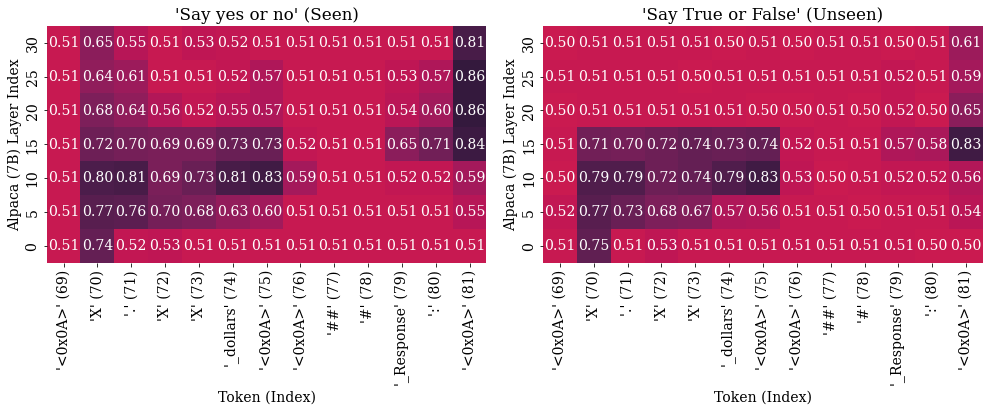

In [82]:
df = pd.DataFrame(list(original.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_original_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(transfer.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_transfer_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 14}
plt.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(14, 5.5))
sns.heatmap(
    heatmap_original_df, yticklabels=heatmap_original_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[0],
    xticklabels=["'<0x0A>' (69)", "'X' (70)", "'.' (71)", "'X' (72)", "'X' (73)", 
                 "'_dollars' (74)", "'<0x0A>' (75)", 
                 "'<0x0A>' (76)", "'##' (77)", "'#' (78)", 
                 "'_Response' (79)", "':' (80)", "'<0x0A>' (81)"]
)

sns.heatmap(
    heatmap_transfer_df, yticklabels=heatmap_transfer_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[1],
    xticklabels=["'<0x0A>' (69)", "'X' (70)", "'.' (71)", "'X' (72)", "'X' (73)", 
                 "'_dollars' (74)", "'<0x0A>' (75)", 
                 "'<0x0A>' (76)", "'##' (77)", "'#' (78)", 
                 "'_Response' (79)", "':' (80)", "'<0x0A>' (81)"]
)

ax[0].set(xlabel='Token (Index)',
       ylabel='Alpaca (7B) Layer Index',
       title="'Say yes or no' (Seen)")
ax[1].set(xlabel='Token (Index)',
       ylabel='Alpaca (7B) Layer Index',
       title="'Say True or False' (Unseen)")

fig.tight_layout()
# plt.show()
plt.savefig("./logs/different-return-transfer.svg", bbox_inches='tight')

#### plot the boundary learning

In [6]:
def process_wandb_csv(raw_df):
    data = {}
    raw_df = raw_df.fillna(0)
    for column_name, column_data in raw_df.iteritems():
        if "alpaca" in column_name and "MAX" not in column_name and "MIN" not in column_name:
            layer = int(column_name.split(".")[-4])
            token_id = int(column_name.split(".")[-2])
            data[(layer, token_id)] = column_data.tolist()
    return data

def slice_data(data, flag):
    positive_data = []
    negative_data = []
    for k, v in data.items():
        if flag[k]:
            positive_data += [v]
        else:
            negative_data += [v]
    return positive_data, negative_data

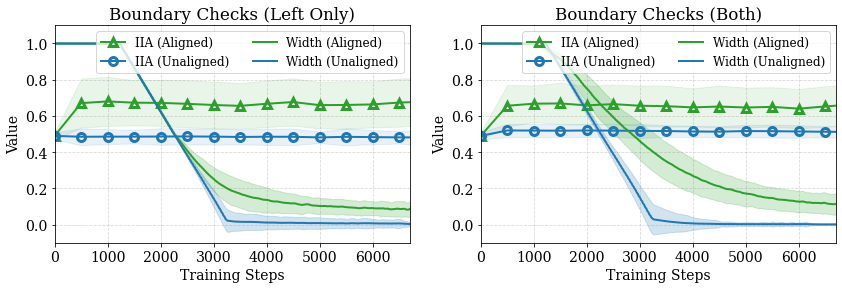

In [34]:
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 14}
plt.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# i am lazy ...
eval_acc_file = "./logs/lb_eval_acc.csv"
boundary_file = "./logs/lb_boundary.csv"
train_acc_file = "./logs/lb_train_acc.csv"
eval_acc_df = pd.read_csv(eval_acc_file)
boundary_df = pd.read_csv(boundary_file)
train_acc_df = pd.read_csv(train_acc_file)
eval_acc_data = process_wandb_csv(eval_acc_df)
boundary_data = process_wandb_csv(boundary_df)
train_acc_data = process_wandb_csv(train_acc_df)
boundary_boolean_data = {}
for k, v in boundary_data.items():
    if v[-1] < 1e-2:
        boundary_boolean_data[k] = False
    else:
        boundary_boolean_data[k] = True
eval_acc_positive, eval_acc_negative = slice_data(eval_acc_data, boundary_boolean_data)
train_acc_positive, train_acc_negative = slice_data(train_acc_data, boundary_boolean_data)
boundary_positive, boundary_negative = slice_data(boundary_data, boundary_boolean_data)

# Convert the data to numpy arrays
data_array1 = np.array(eval_acc_positive)
data_array2 = np.array(eval_acc_negative)

# Calculate the mean and standard deviation along the time axis (axis=0)
mean1 = np.mean(data_array1, axis=0)
std_dev1 = np.std(data_array1, axis=0)

mean2 = np.mean(data_array2, axis=0)
std_dev2 = np.std(data_array2, axis=0)

# it is unfortunate that i did not include the starting point data,
# i have to include this buy hand here.
mean1 = np.append([0.49], mean1, axis=0)
std_dev1 = np.append([0.02], std_dev1, axis=0)
mean2 = np.append([0.49], mean2, axis=0)
std_dev2 = np.append([0.02], std_dev2, axis=0)

# Create the x-axis as a range of time steps
acc_steps = [i*500 for i in range(0, len(mean1))]

# Plot the mean and standard deviation as shaded regions for both datasets
ax[0].plot(
    acc_steps, mean1, label='IIA (Aligned)',
    marker='^', color='#2ca02c', markersize=8, linewidth=2,
    markerfacecolor='none', markeredgecolor='#2ca02c', markeredgewidth=3
)
ax[0].fill_between(acc_steps, mean1 - std_dev1, mean1 + std_dev1, color='#2ca02c', alpha=0.1)

ax[0].plot(
    acc_steps, mean2, label='IIA (Unaligned)',
    marker='o', color='#1f77b4', markersize=8, linewidth=2, 
    markerfacecolor='none', markeredgecolor='#1f77b4', markeredgewidth=3
)
ax[0].fill_between(acc_steps, mean2 - std_dev2, mean2 + std_dev2, color='#1f77b4', alpha=0.1)

# Convert the data to numpy arrays
data_array1 = np.array(boundary_positive)
data_array2 = np.array(boundary_negative)

# Calculate the mean and standard deviation along the time axis (axis=0)
mean1 = np.mean(data_array1, axis=0)
std_dev1 = np.std(data_array1, axis=0)

mean2 = np.mean(data_array2, axis=0)
std_dev2 = np.std(data_array2, axis=0)

boundary_steps = [i*10 for i in range(1, len(mean1)+1)]

# Plot the mean and standard deviation as shaded regions for both datasets
ax[0].plot(
    boundary_steps, mean1, label='Width (Aligned)', color='#2ca02c', linewidth=2, 
)
ax[0].fill_between(boundary_steps, mean1 - std_dev1, mean1 + std_dev1, color='#2ca02c', alpha=0.2)

ax[0].plot(
    boundary_steps, mean2, label='Width (Unaligned)', color='#1f77b4', linewidth=2, 
)
ax[0].fill_between(boundary_steps, mean2 - std_dev2, mean2 + std_dev2, color='#1f77b4', alpha=0.2)

# i am lazy ...
eval_acc_file = "./logs/lub_eval_acc.csv"
boundary_file = "./logs/lub_boundary.csv"
eval_acc_df = pd.read_csv(eval_acc_file)
boundary_df = pd.read_csv(boundary_file)
eval_acc_data = process_wandb_csv(eval_acc_df)
boundary_data = process_wandb_csv(boundary_df)
boundary_boolean_data = {}
for k, v in boundary_data.items():
    if v[-1] < 1e-2:
        boundary_boolean_data[k] = False
    else:
        boundary_boolean_data[k] = True
eval_acc_positive, eval_acc_negative = slice_data(eval_acc_data, boundary_boolean_data)
boundary_positive, boundary_negative = slice_data(boundary_data, boundary_boolean_data)

# Convert the data to numpy arrays
data_array1 = np.array(eval_acc_positive)
data_array2 = np.array(eval_acc_negative)

# Calculate the mean and standard deviation along the time axis (axis=0)
mean1 = np.mean(data_array1, axis=0)
std_dev1 = np.std(data_array1, axis=0)

mean2 = np.mean(data_array2, axis=0)
std_dev2 = np.std(data_array2, axis=0)

# it is unfortunate that i did not include the starting point data,
# i have to include this buy hand here.
mean1 = np.append([0.49], mean1, axis=0)
std_dev1 = np.append([0.02], std_dev1, axis=0)
mean2 = np.append([0.49], mean2, axis=0)
std_dev2 = np.append([0.02], std_dev2, axis=0)

# Create the x-axis as a range of time steps
acc_steps = [i*500 for i in range(0, len(mean1))]

# Plot the mean and standard deviation as shaded regions for both datasets
ax[1].plot(
    acc_steps, mean1, label='IIA (Aligned)',
    marker='^', color='#2ca02c', markersize=8, linewidth=2,
    markerfacecolor='none', markeredgecolor='#2ca02c', markeredgewidth=3
)
ax[1].fill_between(acc_steps, mean1 - std_dev1, mean1 + std_dev1, color='#2ca02c', alpha=0.1)

ax[1].plot(
    acc_steps, mean2, label='IIA (Unaligned)',
    marker='o', color='#1f77b4', markersize=8, linewidth=2, 
    markerfacecolor='none', markeredgecolor='#1f77b4', markeredgewidth=3
)
ax[1].fill_between(acc_steps, mean2 - std_dev2, mean2 + std_dev2, color='#1f77b4', alpha=0.1)

# Convert the data to numpy arrays
data_array1 = np.array(boundary_positive)
data_array2 = np.array(boundary_negative)

# Calculate the mean and standard deviation along the time axis (axis=0)
mean1 = np.mean(data_array1, axis=0)
std_dev1 = np.std(data_array1, axis=0)

mean2 = np.mean(data_array2, axis=0)
std_dev2 = np.std(data_array2, axis=0)

boundary_steps = [i*10 for i in range(1, len(mean1)+1)]

# Plot the mean and standard deviation as shaded regions for both datasets
ax[1].plot(
    boundary_steps, mean1, label='Width (Aligned)', color='#2ca02c', linewidth=2, 
)
ax[1].fill_between(boundary_steps, mean1 - std_dev1, mean1 + std_dev1, color='#2ca02c', alpha=0.2)

ax[1].plot(
    boundary_steps, mean2, label='Width (Unaligned)', color='#1f77b4', linewidth=2, 
)
ax[1].fill_between(boundary_steps, mean2 - std_dev2, mean2 + std_dev2, color='#1f77b4', alpha=0.2)

ax[0].set_xlabel('Training Steps')
ax[0].set_ylabel('Value')
ax[0].set_title('Boundary Checks (Left Only)')
ax[0].legend(loc='upper right', fontsize="12", ncol=2)
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_xlim(0, 6700)

ax[1].set_xlabel('Training Steps')
ax[1].set_ylabel('Value')
ax[1].set_title('Boundary Checks (Both)')
ax[1].legend(loc='upper right', fontsize="12", ncol=2)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_xlim(0, 6700)

ax[0].grid(which='major', axis='x', linestyle='--', color='gray', alpha=0.3)
ax[0].grid(which='major', axis='y', linestyle='--', color='gray', alpha=0.3)
ax[1].grid(which='major', axis='y', linestyle='--', color='gray', alpha=0.3)
ax[1].grid(which='major', axis='x', linestyle='--', color='gray', alpha=0.3)

# Show the plot
# plt.show()

plt.savefig("./logs/boundary-learning.svg", bbox_inches='tight')